### The Battle of the Neighborhoods - Open an hotel in Queens New York city 

### Introduction 
In New York city, the borough of Manhattan is an important location for many groups of people. It is the 
financial hub for thousand of travelers conducting business and a prime destination for the millions of tourist 
traveling to New York annually. As a result of this, hotel cost in Manhattan can be very expensive compared to the
neighboring boroughs.

#### Business Problem
To alleviate this problem for travelers, a hotel company wants to build one of their hotels in the 
less expensive neighboring borough of Queens.The company wants to build the hotel in a Queens neighborhood that
has the minimum amount of competitor hotels to reduce compitition and also close to Manhattan so to reduce travel time
and cost for its customers. Using data science the company wants to determine which neighborhood or neighborhoods in 
the borough of Queens can satisfy these requirements.

#### Data Collection and Methodology 
To solve this problem, we will need a dataset on New York city neighborhoods and hotel data from the FourSquare location platform. More specifically we need location data on all neighborhoods in the borough of Queens and the total number of hotels in each neighborhood. The location data will be used to calculate the distance from each Queens neighborhood to midtown Manhattan.This data along with the hotel data will then be clustered to determine the ideal neighborhood.To accomplish this, we will use data science visualization techniques such as mapping to view the neighborhoods and machine learning algorithms such Kmeans to cluster the data. Location data and hotel data will be obtained from the website https://geo.nyu.edu/catalog/nyu_2451_34572 and the FourSquare database respectively.

#### Import all required libraries 
Before downloading the data let import all the necessary libraries required to solve the problem 

In [56]:
import numpy as np #Library to handle data in a vectorized manner 

import pandas as pd # library for data analysis 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

! pip install geopy 
from geopy.geocoders import Nominatim # convert an address into longitude and latitude values 

import json # library to handle JSON files 

import requests # library to handle request 
from pandas.io.json import json_normalize # Transform JSON file into a pandas dataframe 

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means for clustering 
from sklearn.cluster import KMeans

! pip install folium 
import folium # Map rendering library 
print('All libraries and modules installed')

All libraries and modules installed


#### Download and Explore the dataset 
We will download and explore the dataset from both the borough of Manhattan and Queens. The New York neighborhood dataset is already located on IBM storage so we will download it from there using !wget command. 

In [57]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


Next we will load and explore the data 

In [58]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [59]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

All the neighborhood data is in the 'feature' key so lets assign it a new variable neighborhood_data  

In [60]:
neighborhood_data = newyork_data['features']
neighborhood_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a pandas dataframe
The next task is to tranform this data of nested Python dictionaries into a pandas dataframe. We will start by creating an empty dataframe

In [61]:
#define the dataframe columns 
columns_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

# Create dataframe with empthy columns
neighborhoods = pd.DataFrame(columns = columns_names)

# View empty dataframe
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Next lets loop the data and fill the empty dataframe one row at a time 

In [62]:
for data in neighborhood_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough, 
                                           'Neighborhood':neighborhood_name,
                                           'Latitude':neighborhood_lat, 
                                            'Longitude':neighborhood_lon}, ignore_index=True)  

Next lets examine the resulting dataframe 

In [63]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Verify the boroughs and neighborhoods in dataframe 

In [64]:
print('Boroughs in the NYC:',len(neighborhoods['Borough'].unique()))
print ('Data dimension:', neighborhoods.shape)

Boroughs in the NYC: 5
Data dimension: (306, 4)


#### Filter dataframe to get Queens neighborhoods
Our focus is on the boroughs of Queens and Manhattan. We will filter the dataframe to show Queens neighborhoods    

In [65]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop = True)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### Create a map of New York city with Queens neighborhoods imposed on top 
In order to get a map of New York city we need to first get the longitude and latitude of Queens and Manhattan. We will use geopy library to accomplish this. 

In [66]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [67]:
address = '234 W 42nd St, New York, NY 10036'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
man_lat = location.latitude
man_long = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(man_lat, man_long))

The geograpical coordinate of Manhattan are 40.75668515, -73.98926649582987.


#### We will now create a map of New York city with Queens neighborhoods superimposed on top 

In [68]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through Queens_data and add neighborhood markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=7,
        parse_html=False).add_to(map_queens) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_queens)
    
map_queens

The above map shows the Queens neighborhoods that are closest to Manhattan.The neighborhoods in Queens are represented by the blue dots and the red dot represents Time Square in Mid-town Manhattan. Midtown Manhattan is generally where most business travelers and tourist start there visit so it only makes sense to use this location as part of our distance calculation. To determine which neighborhood in Queens is closer to Manhattan, we will use the location data to calculate the distance between mid-town Manhattan and the Queens neighborhoods. But before we do that let take a look at where hotels are located in Queens relative to Manhattan.  

#### Create a map of hotels in Queens 
In order to display the hotels in Queens, we need to access them from the FourSquare database. We will access all the venues in the Queens neighborhoods then filter the hotel data. We will start by inputting our FourSquare credentials

In [69]:
CLIENT_ID = 'CME3JSCWRLAD1UO2OOPZTGQDK1UNBSKUYSQLMQJL5ZD2T5TS' # your Foursquare ID
CLIENT_SECRET = 'VRG23KICUYUDVGW0RML3FYYXX3PH10HNBVWCM0QOLZ4ODQ21' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CME3JSCWRLAD1UO2OOPZTGQDK1UNBSKUYSQLMQJL5ZD2T5TS
CLIENT_SECRET:VRG23KICUYUDVGW0RML3FYYXX3PH10HNBVWCM0QOLZ4ODQ21


Let create a function to get all venues in Queens 

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call the getNearbyVenues function and store the results in Queens_venues 

In [71]:
# Call the getNearbyVenues function and store the results in Queens_venues
Queens_venues = getNearbyVenues(names=Queens_data['Neighborhood'],
                                   latitudes=Queens_data['Latitude'],
                                   longitudes=Queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


Display Queens_venues dataframe head and dimension   

In [72]:
print(Queens_venues.shape)
Queens_venues.head()

(2080, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


We will now filter the hotel data from the Queens_venue dataframe 

In [73]:
Hotel_data = Queens_venues[Queens_venues['Venue Category'] == 'Hotel'].reset_index(drop = True)
print(Hotel_data.shape)
Hotel_data.head()

(18, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Flushing,40.764454,-73.831773,Marco LaGuardia Hotel by Lexington,40.763567,-73.831048,Hotel
1,Long Island City,40.750217,-73.939202,Hilton Garden Inn,40.750216,-73.936886,Hotel
2,Long Island City,40.750217,-73.939202,Courtyard Long Island City/New York Manhattan ...,40.750080,-73.937226,Hotel
3,Long Island City,40.750217,-73.939202,Hyatt Place Long Island City / New York City,40.748154,-73.941484,Hotel
4,Long Island City,40.750217,-73.939202,Aloft Long Island City-Manhattan View,40.748279,-73.939824,Hotel


Create map of hotels in Queens 

In [74]:
# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# Loop through Queens_data and add neighborhood markers to map
for lat, lng, label in zip(Hotel_data['Venue Latitude'], Hotel_data['Venue Longitude'], Hotel_data['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='green',
        fill_opacity=7,
        parse_html=False).add_to(map_queens) 
    
folium.CircleMarker(
        [man_lat, man_long],
        radius=10,
        popup='Midtown Manhattan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=7,
        parse_html=False).add_to(map_queens)
    
map_queens

Interestingly the map also shows that most of the hotels in Queens exist in neighborhoods that are close to Manhattan. Lets view the number of hotels in each neigborhood on a bargraph.

In [75]:
# Use one hot encoding on the Venue Category 
Hotel_onehot = pd.get_dummies(Hotel_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Hotel_onehot.insert(0,'Neighborhood', Hotel_data['Neighborhood'], True ) 
Hotel_onehot.head()

,Neighborhood,Hotel
0,Flushing,1
1,Long Island City,1
2,Long Island City,1
3,Long Island City,1
4,Long Island City,1


In [76]:
# Sum up the hotels in each neighborhood 
Hotel_df = Hotel_onehot.groupby('Neighborhood').sum()
Hotel_df

,Hotel
Neighborhood,
Blissville,1
Edgemere,1
Flushing,1
Lindenwood,1
Long Island City,8
Queens Village,1
Queensbridge,3
South Ozone Park,1
Sunnyside,1


Quick look at the descriptive statistic data

In [77]:
# Descriptive statistic 
Hotel_df.describe()

,Hotel
count,9.000000
mean,2.000000
std,2.345208
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


Import matplotlib for plotting 

In [78]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


Plot bar-graph of hotels vs neighborhood  

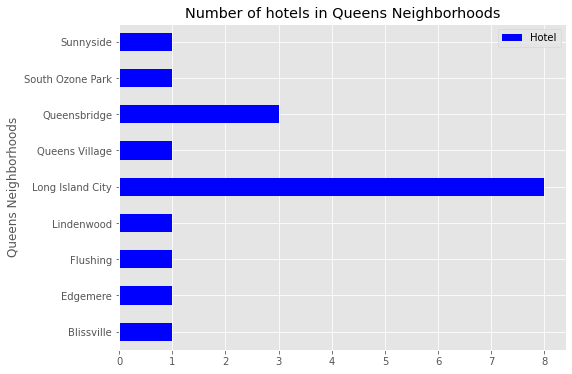

In [79]:
Hotel_df.plot(kind='barh', figsize=(8, 6), color = 'blue')

plt.title('Number of hotels in Queens Neighborhoods')
plt.ylabel('Queens Neighborhoods')

plt.show()

So both the above bar graph and previous maps shows us that the Queens neighborhoods that are closest to Manhattan also have the most hotels. One example is the Long Island City neighborhood with 8 total hotels.This visual insite helps us to rule out most neighborhoods close to Manhattan has potential candidates. The visualization tools used above gave us some value insite into the data but further analysis is needed to determine the ideal neigborhood. Remember the goal is to find the Queens neighborhood that is closest to Manhattan with least amount of hotels. Now that we have the number of hotels in each neigborhood, we need to calculate the distance between the Queens neighborhoods and Mid-town Manhattan.The results will then be added our existing feature set to be clustered.     

#### Calculate the distance between the Manhattan and Queens neigborhoods 

To calculate the distance between the Queens neighborhoods and mid-town Manhattan I found a function on the internet that does this using the haversine formula. Let import this function and test it. 

In [80]:
pip install git+https://github.com/nathanrooy/spatial-analysis # install and import the haversine function 

  Cloning https://github.com/nathanrooy/spatial-analysis to /tmp/wsuser/pip-req-build-51owu_9s
  Running command git clone -q https://github.com/nathanrooy/spatial-analysis /tmp/wsuser/pip-req-build-51owu_9s
  Created wheel for spatial: filename=spatial-0.0.1-py3-none-any.whl size=15769 sha256=82d9c20faa3eb6ff46dd9b357f50fc69d86e6c3e11d7f8e027a74b09375f4a10
  Stored in directory: /tmp/wsuser/pip-ephem-wheel-cache-lbwri0k4/wheels/0b/2a/7c/3a4728653ce163f9153edb3d87fc4e2b6579e019ec154a500a
Successfully built spatial
Note: you may need to restart the kernel to use updated packages.


Import haversine function and test 

In [81]:
 from spatial import haversine
>>> p1 = [man_long, man_lat]     # p1=[longitude_1, latitude_1] of manhattan
>>> p2 = [longitude, latitude]     # p2=[longitude_2, latitude_2] of neighborhoods in Queens 
>>> haversine(p1, p2).mi()             # miles

10.04127428886856

As you can see given the longitude and latitude of two points p1 and p2 you can calculate the distance between them using this function. Now let apply this to all the neighborhoods in Queens and mid-town Manhattan. We will loop through Queen_data and calculate the distance from each neighborhood to mid-town Manhattan.    

In [82]:
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


I created a function called getDistance that will accept the longitude and latitude values of each neighborhood and returns the distance between each neighborhood and mid-town Manhattan. 

In [83]:
# Function to calculate the distance between each Queens neighborhood and Manhattan 
def getDistance(names,longitude,latitude):
    dist_list=[]
    for name, lat, lng in zip(names, latitude, longitude):
        print(name)
        p1 = [man_long, man_lat] # longitude and latitude of mid-town Manhattan 
        p2 = [lng, lat]   # Longitude and latitude of Queens neighborhoods 
        distance = haversine(p1, p2).mi()   # distance from Queens neighborhood to mid-town Manhattan 
        dist_list.append(distance)     # add distances to distance list 
    return(dist_list)
        

Now let call the detDistance function and return the result list to distance_list 

In [84]:
distance_list = getDistance(names=Queens_data['Neighborhood'],
                                   latitude=Queens_data['Latitude'],
                                   longitude=Queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


Let view the distance_list 

In [85]:
distance_list[0:10]

[3.938022200190533,
 4.631336465252891,
 5.580744201402778,
 5.699845848057289,
 10.619601019580138,
 7.002479032081463,
 7.884582172501259,
 9.075162175389472,
 9.188160958203358,
 8.259778746446127]

Let verify that all rows in Queen_data was processed by comparing the distance_list and Queen_data dimension. 

In [86]:
print(len(distance_list))
print(Queens_data.shape)

81
(81, 4)


Now lets add distance_list to our Queens_data dataframe

In [87]:
# Add distance_list to Queens_data 
Queens_data.insert(4, 'Distance', distance_list)

In [88]:
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance
0,Queens,Astoria,40.768509,-73.915654,3.938022
1,Queens,Woodside,40.746349,-73.901842,4.631336
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744
3,Queens,Elmhurst,40.744049,-73.881656,5.699846
4,Queens,Howard Beach,40.654225,-73.838138,10.619601


Let also merge the two dataframes Queen_data and Hotel_df 

In [89]:
#Reset Hotel_df index before merging with Queen_data 
Hotel_df.reset_index()

,Neighborhood,Hotel
0,Blissville,1
1,Edgemere,1
2,Flushing,1
3,Lindenwood,1
4,Long Island City,8
5,Queens Village,1
6,Queensbridge,3
7,South Ozone Park,1
8,Sunnyside,1


In [90]:
# Add the hotel column to Queens_data by merging Queens_data and Hotel_df using a left join
Queens_data = pd.merge(Queens_data, Hotel_df, how='left', on=['Neighborhood', 'Neighborhood'])

In [91]:
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Queens,Astoria,40.768509,-73.915654,3.938022,NaN
1,Queens,Woodside,40.746349,-73.901842,4.631336,NaN
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744,NaN
3,Queens,Elmhurst,40.744049,-73.881656,5.699846,NaN
4,Queens,Howard Beach,40.654225,-73.838138,10.619601,NaN


In [92]:
# Replace all NAN value in the hotels column to zero 
Queens_data['Hotel'] = Queens_data['Hotel'].fillna(0)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Queens,Astoria,40.768509,-73.915654,3.938022,0.0
1,Queens,Woodside,40.746349,-73.901842,4.631336,0.0
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744,0.0
3,Queens,Elmhurst,40.744049,-73.881656,5.699846,0.0
4,Queens,Howard Beach,40.654225,-73.838138,10.619601,0.0


We now have both the distance data and the hotel data added to Queens_data. To determine the ideal neighborhoods we will cluster this data set. 

In [93]:
# Create a copy of the Queens_data for clustering 
Queens_group_clustering = Queens_data.copy()

In [40]:
Queens_group_clustering.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel
0,Queens,Astoria,40.768509,-73.915654,3.938022,0.0
1,Queens,Woodside,40.746349,-73.901842,4.631336,0.0
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744,0.0
3,Queens,Elmhurst,40.744049,-73.881656,5.699846,0.0
4,Queens,Howard Beach,40.654225,-73.838138,10.619601,0.0


In [41]:
# Drop catagorical data before clustering 
Queens_group_clustering = Queens_group_clustering.drop(['Borough', 'Neighborhood'], axis = 1)

In [42]:
Queens_group_clustering.head()

,Latitude,Longitude,Distance,Hotel
0,40.768509,-73.915654,3.938022,0.0
1,40.746349,-73.901842,4.631336,0.0
2,40.751981,-73.882821,5.580744,0.0
3,40.744049,-73.881656,5.699846,0.0
4,40.654225,-73.838138,10.619601,0.0


Let normal the data 

In [43]:
from sklearn.preprocessing import StandardScaler

X = Queens_group_clustering.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[0:10]

array([[ 1.00453759, -1.48797137, -1.59572884, -0.22941573],
       [ 0.64599263, -1.26341593, -1.41441861, -0.22941573],
       [ 0.73712416, -0.95418115, -1.16613678, -0.22941573],
       [ 0.60876875, -0.93524282, -1.13499023, -0.22941573],
       [-0.84458799, -0.22772181,  0.15158641, -0.22941573],
       [ 0.58180034, -0.53153866, -0.79433559, -0.22941573],
       [ 0.3048284 , -0.33075406, -0.56365474, -0.22941573],
       [-0.02014659, -0.09247898, -0.25230339, -0.22941573],
       [-0.13715719, -0.12522495, -0.22275281, -0.22941573],
       [ 0.93893669, -0.12424604, -0.46553621,  0.80295507]])

In [44]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Queens_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 3, 3, 1, 3, 3, 1, 1, 3], dtype=int32)

In [45]:
Queens_group_clustering.insert(4,'Cluster Labels', kmeans.labels_)

In [46]:
Queens_group_clustering.head()

,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,40.768509,-73.915654,3.938022,0.0,2
1,40.746349,-73.901842,4.631336,0.0,2
2,40.751981,-73.882821,5.580744,0.0,3
3,40.744049,-73.881656,5.699846,0.0,3
4,40.654225,-73.838138,10.619601,0.0,1


Let group the clusters and take the mean of each one. 

In [47]:
Queens_group_clustering.groupby('Cluster Labels').mean()

,Latitude,Longitude,Distance,Hotel
Cluster Labels,,,,
0,40.655367,-73.778493,14.147961,0.068966
1,40.726619,-73.807273,10.133676,0.080000
2,40.754539,-73.922309,3.625852,0.500000
3,40.734603,-73.864636,6.917895,0.062500
4,40.750217,-73.939202,2.658194,8.000000


In [48]:
# add clustering labels to Queens_data 
Queens_data.insert(6, 'Cluster Labels', kmeans.labels_)

In [49]:
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Queens,Astoria,40.768509,-73.915654,3.938022,0.0,2
1,Queens,Woodside,40.746349,-73.901842,4.631336,0.0,2
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744,0.0,3
3,Queens,Elmhurst,40.744049,-73.881656,5.699846,0.0,3
4,Queens,Howard Beach,40.654225,-73.838138,10.619601,0.0,1


#### Lets examine the clusters 

#### Cluster 0

In [50]:
Queens_data.loc[Queens_data['Cluster Labels'] == 0, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
24,Queens,Little Neck,40.770826,-73.738898,13.138631,0.0,0
25,Queens,Douglaston,40.766846,-73.742498,12.933289,0.0,0
26,Queens,Glen Oaks,40.749441,-73.715481,14.338726,0.0,0
27,Queens,Bellerose,40.728573,-73.720128,14.222233,0.0,0
32,Queens,Oakland Gardens,40.745619,-73.754950,12.288359,0.0,0
33,Queens,Queens Village,40.718893,-73.738715,13.374322,1.0,0
34,Queens,Hollis,40.711243,-73.759250,12.445133,0.0,0
36,Queens,St. Albans,40.694445,-73.758676,12.817101,0.0,0
37,Queens,Rochdale,40.675211,-73.772588,12.666924,0.0,0
38,Queens,Springfield Gardens,40.666230,-73.760421,13.516954,0.0,0


Cluster-0 has the furthest neighorhoods to Manhattan with an average of 0.06 hotels.The average distance for neighborhoods in this cluster is 14.14 miles. This makes them not very good candiates

#### Cluster 1

In [51]:
Queens_data.loc[Queens_data['Cluster Labels'] == 1, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
4,Queens,Howard Beach,40.654225,-73.838138,10.619601,0.0,1
7,Queens,Kew Gardens,40.705179,-73.829819,9.075162,0.0,1
8,Queens,Richmond Hill,40.697947,-73.831833,9.188161,0.0,1
18,Queens,Ozone Park,40.680708,-73.843203,9.277053,0.0,1
19,Queens,South Ozone Park,40.668550,-73.809865,11.196470,1.0,1
21,Queens,Whitestone,40.781291,-73.814202,9.317134,0.0,1
22,Queens,Bayside,40.766041,-73.774274,11.269927,0.0,1
23,Queens,Auburndale,40.761730,-73.791762,10.342330,0.0,1
28,Queens,Kew Gardens Hills,40.722578,-73.820878,9.124844,0.0,1
29,Queens,Fresh Meadows,40.734394,-73.782713,10.921404,0.0,1


Cluster-1 has the second furthest neighorhoods to Manhattan with average of 10.13 miles. It also has an average of 0.08 hotels. This makes them not very good candiates

#### Cluster 2

In [52]:
Queens_data.loc[Queens_data['Cluster Labels'] == 2, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
0,Queens,Astoria,40.768509,-73.915654,3.938022,0.0,2
1,Queens,Woodside,40.746349,-73.901842,4.631336,0.0,2
11,Queens,Sunnyside,40.740176,-73.926916,3.457247,1.0,2
44,Queens,Steinway,40.775923,-73.902290,4.741605,0.0,2
57,Queens,Ravenswood,40.761705,-73.931575,3.039158,0.0,2
71,Queens,Astoria Heights,40.770317,-73.894680,5.038724,0.0,2
72,Queens,Hunters Point,40.743414,-73.953868,2.067334,0.0,2
73,Queens,Sunnyside Gardens,40.745652,-73.918193,3.797423,0.0,2
74,Queens,Blissville,40.737251,-73.932442,3.263512,1.0,2
80,Queens,Queensbridge,40.756091,-73.945631,2.284163,3.0,2


Cluster-2 has the second closest neighorhoods to Manhattan with an average of 3.62 miles and second most hotels with an average of 0.4. This makes them good candiates. Looking deeper into the cluster we can narrow our choices down to neighborhood with no hotels such as Astoria, Woodside, Steinway, Ravenswood, Astoria Heights,Hunts point and Sunyside Gardens.

#### Cluster 3

In [53]:
Queens_data.loc[Queens_data['Cluster Labels'] == 3, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
2,Queens,Jackson Heights,40.751981,-73.882821,5.580744,0.0,3
3,Queens,Elmhurst,40.744049,-73.881656,5.699846,0.0,3
5,Queens,Corona,40.742382,-73.856825,7.002479,0.0,3
6,Queens,Forest Hills,40.725264,-73.844475,7.884582,0.0,3
9,Queens,Flushing,40.764454,-73.831773,8.259779,1.0,3
12,Queens,East Elmhurst,40.764073,-73.867041,6.416920,0.0,3
13,Queens,Maspeth,40.725427,-73.896217,5.328414,0.0,3
14,Queens,Ridgewood,40.708323,-73.901435,5.684371,0.0,3
15,Queens,Glendale,40.702762,-73.870742,7.238282,0.0,3
16,Queens,Rego Park,40.728974,-73.857827,7.142066,0.0,3


Cluster-3 has the third furthest neighorhoods to Manhattan with an average of 0.12 hotels.The average distance for neighborhoods in this cluster is 6.13 miles. This makes them not good candiates

#### Cluster 4

In [54]:
Queens_data.loc[Queens_data['Cluster Labels'] == 4, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Distance,Hotel,Cluster Labels
10,Queens,Long Island City,40.750217,-73.939202,2.658194,8.0,4


Cluster-4 has the closest neighorhoods to Manhattan. It however has the most hotels among all the Queens neighhorhoods making it a very poor candidate. 

#### Finally let visualize the clusters 

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood'], Queens_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results and Discussion 

After carefully analyzing each cluster, it appears that cluster2 satisfied our condition of neighborhoods closest to Manhattan with the minimum amount of hotels. Looking deeper into cluster2 we can narrow our choices down to neighborhoods with no hotels such as Astoria, Woodside, Steinway, Ravenswood, Astoria Heights,Hunts point and Sunyside Gardens.From this list, we now recommend the following neigbhorhoods base on their distance from Manhattan. 

In [56]:
final_List = Queens_data.loc[Queens_data['Cluster Labels'] == 2, Queens_data.columns[[0] + list(range(1, Queens_data.shape[1]))]]

In [57]:
final_List = final_List.drop(['Latitude', 'Longitude','Cluster Labels'], axis = 1)
final_List = final_List.loc[final_List['Hotel']==0, final_List.columns[[0] + list(range(1, final_List.shape[1]))]]

In [65]:
final_List.sort_values(by='Distance')
#final_List.reset_index(drop = True, inplace = True)
#final_List

,Borough,Neighborhood,Distance,Hotel
5,Queens,Hunters Point,2.067334,0.0
3,Queens,Ravenswood,3.039158,0.0
6,Queens,Sunnyside Gardens,3.797423,0.0
0,Queens,Astoria,3.938022,0.0
1,Queens,Woodside,4.631336,0.0
2,Queens,Steinway,4.741605,0.0
4,Queens,Astoria Heights,5.038724,0.0


### Conclusion 

In summary we determined the Queens neighborhoods closest to Manhattan with the minimum amount of hotels, by clustering the number of hotels in each Queens neighborhood and the distances from each Queens neighborhood to Manhattan. Our anaylsis found that there are 7 Queens neighborhoods within 5 miles of Manhattan with no hotels. All 7 neighborhoods are potential candidates to build a hotel and further investigation is needed to determine the ideal neighborhood and a prime building location within that neighborhood. The recommended list of Queens neighborhoods are shown in the table above. 